### Plot raw data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_feather('Data/map_23-03-02.feather')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7301 entries, 0 to 7300
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           7301 non-null   object        
 1   name            7301 non-null   object        
 2   current         7301 non-null   object        
 3   flow_rate       7301 non-null   float64       
 4   voltage         7301 non-null   float64       
 5   current_PS      7301 non-null   float64       
 6   temperature     7301 non-null   float64       
 7   humidity        7301 non-null   int64         
 8   date_and_time   7301 non-null   datetime64[ns]
 9   target_voltage  7301 non-null   int64         
 10  mean            7301 non-null   float64       
 11  variance        7301 non-null   float64       
 12  deviation       7301 non-null   float64       
 13  median          7301 non-null   float64       
 14  rms             7301 non-null   float64       
 15  spra

In [5]:

df = df.drop(columns=['index', 'name', 'current_PS', 'target_voltage'])

In [9]:

df = df.loc[df['flow_rate'] == 0.5]

df.reset_index(drop=True).head()

,current,flow_rate,voltage,temperature,humidity,date_and_time,mean,variance,deviation,median,rms,spray_mode
0,"[4.779874324798584, 2.767295598983764, 8.30188...",0.5,3001.60,23.1,37,2023-03-02 14:55:23.347102,0.828372,21.672516,4.655375,1.006289,4.728500,Dripping
1,"[-2.01257848739624, 4.52830171585083, 4.025156...",0.5,3001.60,23.1,37,2023-03-02 14:55:24.100557,0.763567,21.944117,4.684455,1.006289,4.746277,Dripping
2,"[-2.767295598983764, 3.522012710571289, 11.572...",0.5,3001.60,23.1,37,2023-03-02 14:55:24.795415,1.200654,21.832703,4.672548,1.257862,4.824342,Dripping
3,"[2.51572322845459, 1.761006355285644, 1.509433...",0.5,3101.35,23.1,37,2023-03-02 14:55:25.585353,1.159587,21.792826,4.668279,1.257862,4.810142,Dripping
4,"[6.792452812194824, -0.5031446218490601, 1.257...",0.5,3101.35,23.1,37,2023-03-02 14:55:26.490027,1.138501,21.732040,4.661764,1.257862,4.798773,Dripping


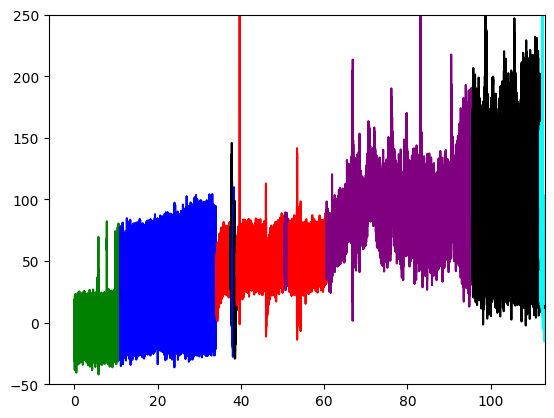

In [17]:
import numpy as np

size = 50000
last_value = 0

for sample in df.index:
    if df['spray_mode'][sample] == 'Dripping':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='green', label='Dripping')
    elif df['spray_mode'][sample] == 'Intermittent':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='blue', label='Intermittent')
    elif df['spray_mode'][sample] == 'Cone Jet':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='red', label='Cone Jet')
    elif df['spray_mode'][sample] == 'Multi Jet':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='purple', label='Multi Jet')
    elif df['spray_mode'][sample] == 'Undefined':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='black', label='Undefined')
    elif df['spray_mode'][sample] == 'Corona':
        plt.plot(np.arange(last_value, last_value + size)/1e5, df['current'][sample], c='cyan', label='Corona')
    last_value += size

plt.ylim(-50, 250)
plt.xlim(right=113)

plt.show()